# Feature Scaling

In this notebook, we're going to focus more on feature scaling. 

As we know, normalization is just one of the feature scaling technique. 
There's a lot more! 
Here we introduce four most commonly used techniques for feature scaling. 

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn import datasets
from scipy.stats import mode, norm, skew, kurtosis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True, palette="deep")

The four feature scaling techniques in Scikitlearn are: 

**StandardScalar, MinMaxScaler, RobustScaler and Normalizer.** 

Each of the technique is used in different situation.

### StandardScalar

Standarlize the data by: (x - mean(x)) / std(x)
StandardScalar assumes that the dataset is normal distributed. So if you're dataset is skewed, you may want to handle skewness first.(We talked about how to handle skewed data in the previous part.)

### MinMaxScalar

MinMaxScalar scales the data to (0, 1) range by: (x - min(x)) / (max(x) - min(x))

Pretty useful in, for example, image processing or handling non-normal distributed data.

However, MinMaxScalar is sensitive to outliers. 

So if your model is also sensitive to outliers, use RobustScalar instead.

### RobustScaler

(x - Q1(x)) / (Q3(x) - Q1(x))
RobustScaler use quartiles instead of using minimum and maximum value. 

And because of this, RobustScaler is robust to outliers.

Some models are sensitive to outliers. 

For instance,linear model like Lasso (L1 regularization). In this case, use RobustScaler instead.

### Normalizer

Normalizer scales individual samples and make samples have unit norm.
(In other words, Normalizer do normalization on each row, while the other scalers introduced above scale on each column.)

It is commonly used when doing text classification or some other vector space tasks.

### Load IRIS Dataset

In [2]:
iris = datasets.load_iris()
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
df = pd.DataFrame(iris.data, columns=columns)
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


By plotting the variables using kdeplot, we can clearly see their distribution.

For sepal_length and sepal_width, we use StandardScaler since they look like normal distribution.

As for petal_length and petal_width, they look like bimodal distribution. We use MinMaxScaler instead.

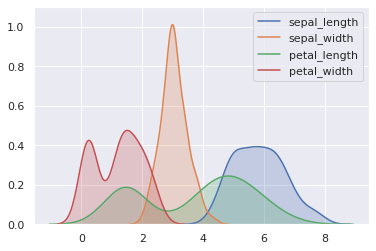

In [8]:
plt.ylim(0, 1.1)
sns.kdeplot(df["sepal_length"], shade=True)
sns.kdeplot(df["sepal_width"], shade=True)
sns.kdeplot(df["petal_length"], shade=True)
sns.kdeplot(df["petal_width"], shade=True)

In [10]:
def plot_kde(df, col1, col2, scaler, title, ymax=1):
    print("Before transformation")
    print(col1, ": mean:", np.mean(df[col1]),"std:", np.std(df[col1]))
    print(col2, ": mean:", np.mean(df[col2]),"std:", np.std(df[col2]))
    
    transformed_df = scaler.fit_transform(df)
    transformed_df = pd.DataFrame(transformed_df, columns=df.columns)

    print("After transformation")
    print(col1, ": mean:", np.mean(transformed_df[col1]),"std:", np.std(transformed_df[col1]))
    print(col2, ": mean:", np.mean(transformed_df[col2]),"std:", np.std(transformed_df[col2]))
    
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].set_xlabel("unit (cm)")
    ax[0].set_ylim(0, ymax)
    
    ax[0].set_title("Origin data")
    sns.kdeplot(df[col1], ax=ax[0], shade=True)
    sns.kdeplot(df[col2], ax=ax[0], shade=True)
    
    ax[1].set_xlabel("unit (cm)")
    ax[1].set_ylim(0, ymax)
    ax[1].set_title(title)
    
    sns.kdeplot(transformed_df[col1], ax=ax[1], shade=True)
    sns.kdeplot(transformed_df[col2], ax=ax[1], shade=True)
    plt.show()

### Standardize Data

Before transformation
sepal_length : mean: 5.843333333333335 std: 0.8253012917851409
sepal_width : mean: 3.057333333333334 std: 0.43441096773549437
After transformation
sepal_length : mean: -1.6903145549918008e-15 std: 0.9999999999999998
sepal_width : mean: -1.84297022087776e-15 std: 0.9999999999999993


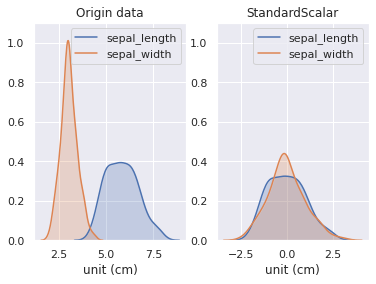

In [11]:
plot_kde(df, "sepal_length", "sepal_width", StandardScaler(), "StandardScalar", ymax=1.1)

### Normalize Data with MinMax Scaler

Before transformation
petal_length : mean: 3.7580000000000027 std: 1.7594040657753032
petal_width : mean: 1.199333333333334 std: 0.7596926279021594
After transformation
petal_length : mean: 0.46745762711864414 std: 0.29820407894496637
petal_width : mean: 0.4580555555555557 std: 0.3165385949592332


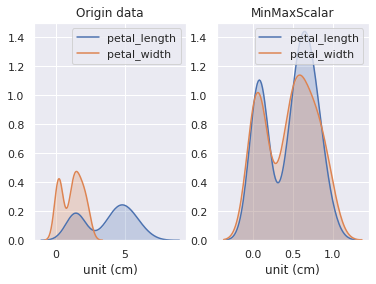

In [12]:
plot_kde(df, "petal_length", "petal_width", MinMaxScaler(), "MinMaxScalar", ymax=1.5)

Since in the iris dataset, there seems be no outliers.
So we're going to generate fake data by adding outliers.

In [13]:
print("(min, max) of petal_length:", min(df["petal_length"]), max(df["petal_length"]))
print("(min, max) of petal_width:", min(df["petal_width"]), max(df["petal_width"]))

(min, max) of petal_length: 1.0 6.9
(min, max) of petal_width: 0.1 2.5


We add two fake data with outliers of petal_length and petal_width here.

In [14]:
df2 = pd.DataFrame([[4.2, 2.0, 10.5, 0.01], [4.2, 2.0, 13, 0.001]], columns=df.columns)
df2 = df.append(df2)

Before transformation
petal_length : mean: 3.863157894736845 std: 1.9760301847033421
petal_width : mean: 1.1836250000000008 std: 0.7668413667398367
After transformation
petal_length : mean: 0.2385964912280701 std: 0.16466918205861192
petal_width : mean: 0.47323929571828727 std: 0.3068592904120997


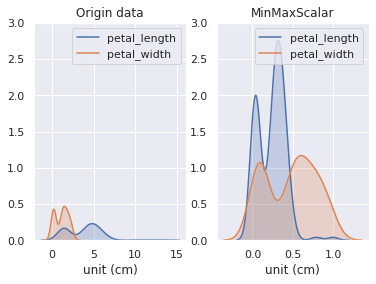

In [15]:
plot_kde(df2, "petal_length", "petal_width", MinMaxScaler(), "MinMaxScalar", ymax=3)

Only with two outliers, the result of scaling using MinMaxScaler can be pretty bad!

Let's see if RobustScaler can fix this problem or not.

Before transformation
petal_length : mean: 3.863157894736845 std: 1.9760301847033421
petal_width : mean: 1.1836250000000008 std: 0.7668413667398367
After transformation
petal_length : mean: -0.15338345864661637 std: 0.5645800527723834
petal_width : mean: -0.07758333333333359 std: 0.5112275778265577


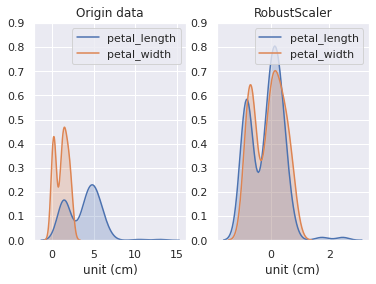

In [16]:
plot_kde(df2, "petal_length", "petal_width", RobustScaler(), "RobustScaler", ymax=0.9)

RobustScaler is really robust to outliers!

And the last scaler is Normalizer.

The example here is three vectors of "bag of words", which is one of the preprocess technique in text classification.

In [17]:
samples = [[1.0, 0.0, 1.0, 1.0, 1.0],
           [0.0, 1.0, 1.0, 0.0, 1.0],
           [1.0, 0.0, 0.0, 1.0, 0.0]]
samples = np.array(samples)
scaler = Normalizer()
transformed = scaler.fit_transform(samples)
print("Before transformed:")
print(samples)
print("After transformed:")
print(transformed)

Before transformed:
[[1. 0. 1. 1. 1.]
 [0. 1. 1. 0. 1.]
 [1. 0. 0. 1. 0.]]
After transformed:
[[0.5        0.         0.5        0.5        0.5       ]
 [0.         0.57735027 0.57735027 0.         0.57735027]
 [0.70710678 0.         0.         0.70710678 0.        ]]


Data preprocessing is very important part in machine learning tasks. 

If we don't have clean data, then our models may not perform well. 

The rule of thumb is "garbage in and garbage out". 

That's why we focus so much on this topic. 

We've learned four feature scaling techniques in data preprocessing in this notebook